In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import requests
import os
from google.colab import userdata

In [2]:
tng_api_key = userdata.get('TNG_API_KEY')
baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":tng_api_key}

In [10]:
def get(path, params=None, out_filename=None):
    headers = {"api-key":tng_api_key}
    r = requests.get(path, params=params, headers=headers)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers or out_filename is not None:
        if out_filename is not None:
            filename = out_filename
        else:
            filename = r.headers['content-disposition'].split("filename=")[1]

        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r

In [11]:
r = get(baseUrl)

for simulation in r['simulations']: #only get TNG50
    if simulation['name'] == 'TNG50-1':
        url = simulation['url']
        break

tng50 = get(url)

url = 'http://www.tng-project.org/api/TNG50-1/snapshots/z=1.8/'
snapshot = get(url)

In [12]:
sub_url1 = f"http://www.tng-project.org/api/TNG50-1/snapshots/1/subhalos/0/"
sub1 = get(sub_url1)

sub_url2 = f"http://www.tng-project.org/api/TNG50-1/snapshots/2/subhalos/0/"
sub2 = get(sub_url2)

sub_url3 = f"http://www.tng-project.org/api/TNG50-1/snapshots/3/subhalos/0/"
sub3 = get(sub_url3)

sub_url4 = f"http://www.tng-project.org/api/TNG50-1/snapshots/4/subhalos/0/"
sub4 = get(sub_url4)

sub_url5 = f"http://www.tng-project.org/api/TNG50-1/snapshots/5/subhalos/0/"
sub5 = get(sub_url5)

In [38]:
cutout_request = {'gas':'Velocities,Coordinates,InternalEnergy,ElectronAbundance'}

cut1 = get(sub_url1+"cutout.hdf5", cutout_request, out_filename = "cut1")
cut2 = get(sub_url2+"cutout.hdf5", cutout_request, out_filename = "cut2")
cut3 = get(sub_url3+"cutout.hdf5", cutout_request, out_filename = "cut3")
cut4 = get(sub_url4+"cutout.hdf5", cutout_request, out_filename = "cut4")
cut5 = get(sub_url5+"cutout.hdf5", cutout_request, out_filename = "cut5")

In [39]:
with h5py.File(cut1,'r') as f:
    x1 = f['PartType0']['Coordinates'][:,0] - sub1['pos_x']
    y1 = f['PartType0']['Coordinates'][:,1] - sub1['pos_y']
    vel1 = f['PartType0']['Velocities'][:]
    u1 = f['PartType0']['InternalEnergy'][:]
    xe1 = f['PartType0']['ElectronAbundance'][:]

with h5py.File(cut2,'r') as f:
    x2 = f['PartType0']['Coordinates'][:,0] - sub2['pos_x']
    y2 = f['PartType0']['Coordinates'][:,1] - sub2['pos_y']
    vel2 = f['PartType0']['Velocities'][:]
    u2 = f['PartType0']['InternalEnergy'][:]
    xe2 = f['PartType0']['ElectronAbundance'][:]

with h5py.File(cut3,'r') as f:
    x3 = f['PartType0']['Coordinates'][:,0] - sub3['pos_x']
    y3 = f['PartType0']['Coordinates'][:,1] - sub3['pos_y']
    vel3 = f['PartType0']['Velocities'][:]
    u3 = f['PartType0']['InternalEnergy'][:]
    xe3 = f['PartType0']['ElectronAbundance'][:]

with h5py.File(cut4,'r') as f:
    x4 = f['PartType0']['Coordinates'][:,0] - sub4['pos_x']
    y4 = f['PartType0']['Coordinates'][:,1] - sub4['pos_y']
    vel4 = f['PartType0']['Velocities'][:]
    u4 = f['PartType0']['InternalEnergy'][:]
    xe4 = f['PartType0']['ElectronAbundance'][:]

with h5py.File(cut5,'r') as f:
    x5 = f['PartType0']['Coordinates'][:,0] - sub5['pos_x']
    y5 = f['PartType0']['Coordinates'][:,1] - sub5['pos_y']
    vel5 = f['PartType0']['Velocities'][:]
    u5 = f['PartType0']['InternalEnergy'][:]
    xe5 = f['PartType0']['ElectronAbundance'][:]

In [40]:
Xh = 0.76           #values for Temp equation
mp = 1.67e-27
kb = 1.38e-23
gamma = 5/3
unitRatio = 1e10

In [41]:
mu1 = 4 / (1 + 3*Xh + 4*Xh*xe1) * mp
T1 = (gamma-1)*unitRatio*mu1*u1/kb
vel_mag1 = np.sqrt(np.sum(vel1**2, axis=1))

mu2 = 4 / (1 + 3*Xh + 4*Xh*xe2) * mp
T2 = (gamma-1)*unitRatio*mu2*u2/kb
vel_mag2 = np.sqrt(np.sum(vel2**2, axis=1))

mu3 = 4 / (1 + 3*Xh + 4*Xh*xe3) * mp
T3 = (gamma-1)*unitRatio*mu3*u3/kb
vel_mag3 = np.sqrt(np.sum(vel3**2, axis=1))

mu4 = 4 / (1 + 3*Xh + 4*Xh*xe4) * mp
T4 = (gamma-1)*unitRatio*mu4*u4/kb
vel_mag4 = np.sqrt(np.sum(vel4**2, axis=1))

mu5 = 4 / (1 + 3*Xh + 4*Xh*xe5) * mp
T5 = (gamma-1)*unitRatio*mu5*u5/kb
vel_mag5 = np.sqrt(np.sum(vel5**2, axis=1))


In [42]:
counts1_1, bin_edges = np.histogram(T1)
counts2_1, bin_edges = np.histogram(vel_mag1)

counts1_2, bin_edges = np.histogram(T2)
counts2_2, bin_edges = np.histogram(vel_mag2)

counts1_3, bin_edges = np.histogram(T3)
counts2_3, bin_edges = np.histogram(vel_mag3)

counts1_4, bin_edges = np.histogram(T4)
counts2_4, bin_edges = np.histogram(vel_mag4)

counts1_5, bin_edges = np.histogram(T5)
counts2_5, bin_edges = np.histogram(vel_mag5)

bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

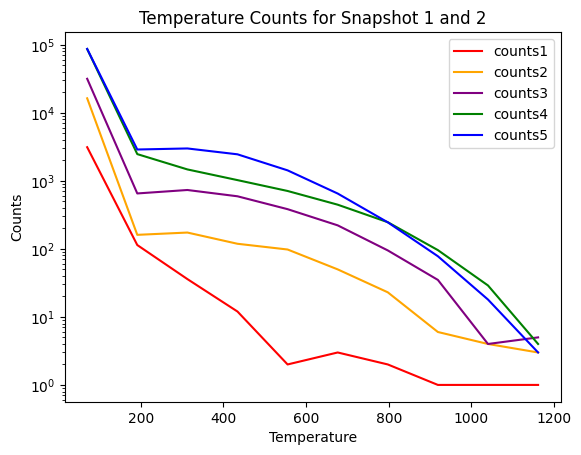

In [47]:
plt.plot(bin_centers, counts1_1, label='counts1', color='red')
plt.plot(bin_centers, counts1_2, label='counts2', color='orange')
plt.plot(bin_centers, counts1_3, label='counts3', color='purple')
plt.plot(bin_centers, counts1_4, label='counts4', color='green')
plt.plot(bin_centers, counts1_5, label='counts5', color='blue')

plt.yscale('log')
plt.ylabel('Counts')
plt.xlabel('Temperature')
plt.legend()
plt.title('Temperature Counts for Snapshot 1 and 2')
plt.show()

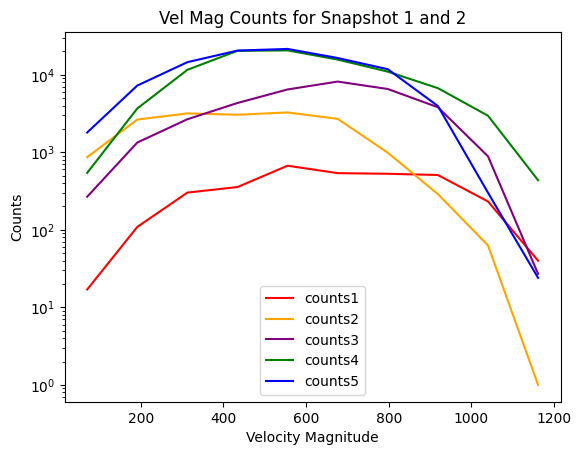

In [48]:
plt.plot(bin_centers, counts2_1, label='counts1', color='red')
plt.plot(bin_centers, counts2_2, label='counts2', color='orange')
plt.plot(bin_centers, counts2_3, label='counts3', color='purple')
plt.plot(bin_centers, counts2_4, label='counts4', color='green')
plt.plot(bin_centers, counts2_5, label='counts5', color='blue')

plt.yscale('log')
plt.ylabel('Counts')
plt.xlabel('Velocity Magnitude')
plt.legend()
plt.title('Vel Mag Counts for Snapshot 1 and 2')
plt.show()

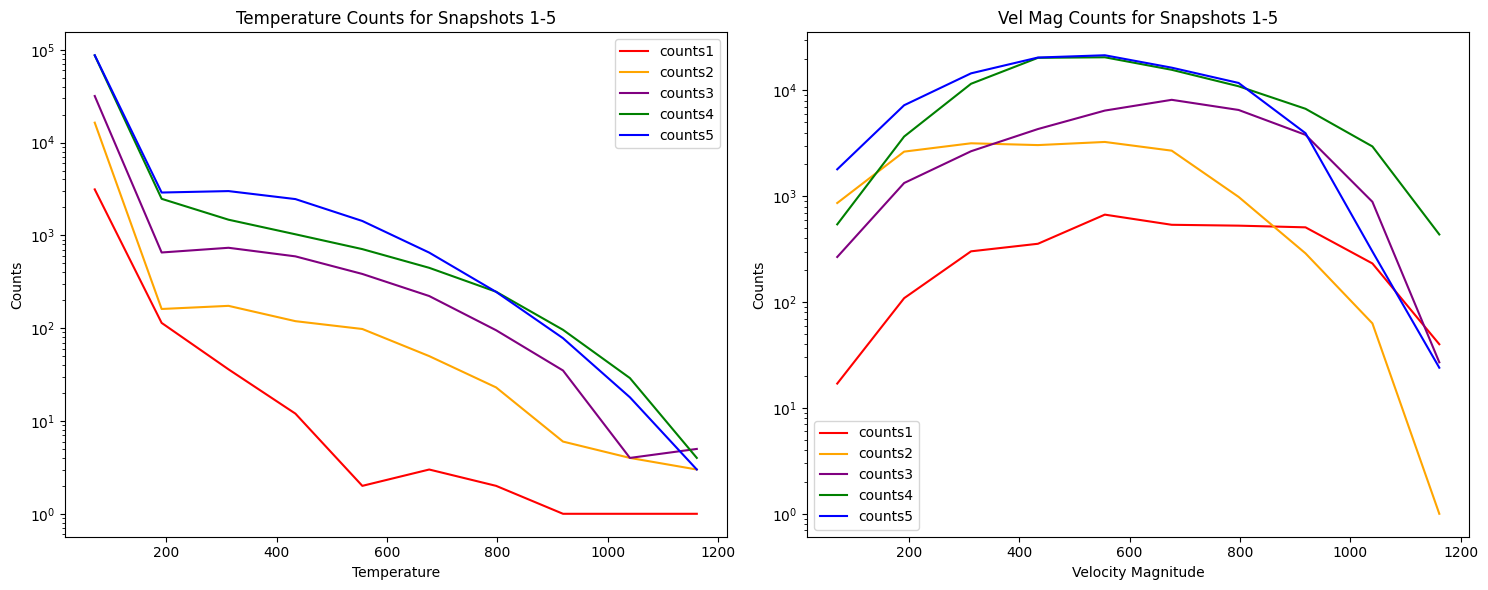

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(bin_centers, counts1_1, label='counts1', color='red')
axes[0].plot(bin_centers, counts1_2, label='counts2', color='orange')
axes[0].plot(bin_centers, counts1_3, label='counts3', color='purple')
axes[0].plot(bin_centers, counts1_4, label='counts4', color='green')
axes[0].plot(bin_centers, counts1_5, label='counts5', color='blue')
axes[0].set_yscale('log')
axes[0].set_ylabel('Counts')
axes[0].set_xlabel('Temperature')
axes[0].legend()
axes[0].set_title('Temperature Counts for Snapshots 1-5')

axes[1].plot(bin_centers, counts2_1, label='counts1', color='red')
axes[1].plot(bin_centers, counts2_2, label='counts2', color='orange')
axes[1].plot(bin_centers, counts2_3, label='counts3', color='purple')
axes[1].plot(bin_centers, counts2_4, label='counts4', color='green')
axes[1].plot(bin_centers, counts2_5, label='counts5', color='blue')
axes[1].set_yscale('log')
axes[1].set_ylabel('Counts')
axes[1].set_xlabel('Velocity Magnitude')
axes[1].legend()
axes[1].set_title('Vel Mag Counts for Snapshots 1-5')

plt.tight_layout()
plt.show()